In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.ndimage
import numpy as np
from keras import backend as K
import keras
import random
from tensorflow.keras import layers
(X_train_base, y_train_base), (X_test_base, y_test_base) = mnist.load_data()

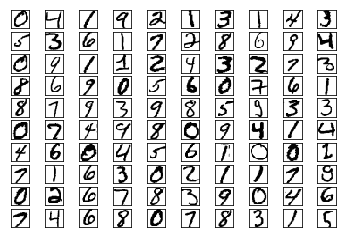

In [2]:
def plot_10_by_10_images(images):
    """Plot 100 MNIST images in a 10 by 10 table.
    Note that we crop the images so that they appear reasonably close together.
    The image is post-processed to give the appearance of being continued."""
    fig = plt.figure()
    images = [image[3:25, 3:25] for image in images]
    #image = np.concatenate(image, axis=1)
    for x in range(10):
        for y in range(10):
            ax = fig.add_subplot(10,10,10*y+x+1)
            ax.matshow(images[10*y+x+1], cmap = matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    plt.show()
    
plot_10_by_10_images(X_train_base)


In [3]:
print(y_train_base)

[5 0 4 ... 5 6 8]


In [11]:
print(X_train_base.shape)

(60000, 28, 28)


In [9]:
subset = 10000 #size
nb_classes=10
X_train = X_train_base[:subset].reshape(subset, 784) #reshape pour passer d'une matrice à un vecteur
X_test = X_test_base.reshape(subset, 784)
X_train = X_train.astype("float32")#modifier en float 
X_test = X_test.astype("float32")
X_train /= 255 #diviser par 255 car c'est la valeur max que peuvent prendre les pixels
X_test /= 255
y_train = np_utils.to_categorical(y_train_base[:subset], nb_classes)#permet de transformer données numériques en catégories
y_test = np_utils.to_categorical(y_test_base, nb_classes)

In [10]:
print(X_train.shape)

(10000, 784)


In [7]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]]


In [62]:
#création d'un model sequential classique
input_shape = 784
model = keras.Sequential([
    layers.Dense(16, activation ='sigmoid', input_shape = (784,)),
    layers.Dropout(rate=0.1),
    layers.Dense(nb_classes, activation = 'softmax')
    ])
#model.add(Dense(12, input_shape = (784,), activation = 'sigmoid'))

#model.add(Dense(nb_classes, activation ='softmax'))

sgd = SGD(lr = 0.09, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer=sgd)

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 16)                12560     
                                                                 
 dropout_16 (Dropout)        (None, 16)                0         
                                                                 
 dense_33 (Dense)            (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


C:\Users\pc\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [63]:
batch_size = 512
epochs = 30
history = model.fit(X_train,
          y_train, 
          batch_size = batch_size, 
          epochs=epochs, 
          verbose=0, 
          validation_data=(X_test, y_test))

The accuracy on the best set is 91.25000238418579 %


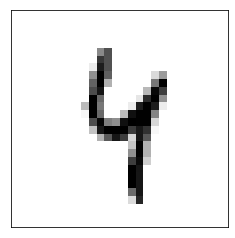

1/1 [==============================] - 0s 34ms/step
Le chiffre reconnu est : 4
Le chiffre à reconnaitre est : 4


In [64]:
def plot_mnist_digit(image):
    """plot a single MNIST image."""
    fig = plt.figure()
    ax = fig.add_subplot(1 ,1 ,1)
    ax.matshow(image, cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.show()
loss, acc = model.evaluate(X_test, y_test, verbose =0)
index = random.randint(1,10000)
print("The accuracy on the best set is", (acc*100),"%")
plot_mnist_digit(X_test_base[index])
cl = np.argmax(model.predict(X_test[index].reshape((1,784))), axis=1)

print("Le chiffre reconnu est :", cl[0])
print("Le chiffre à reconnaitre est :", np.argmax(y_test[index]))
#Meilleur score obtenu est de 91.32%


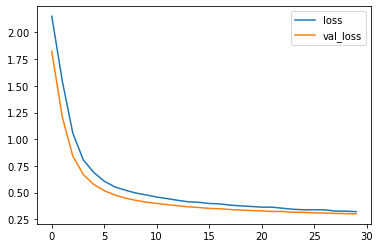

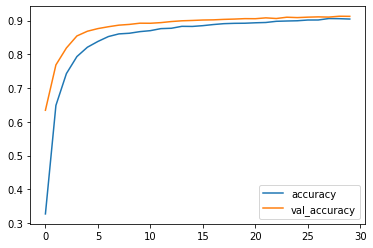

In [65]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();